<div class="alert alert-info alert-warning" style="background-color: white; color: black; text-align: center;">
    <h1><span style="color: red;">Ozan MÖHÜRCÜ</span></h1>
    <h1><span style="color: red;">Data Analyst | Data Scientist</span></h1>

 <div style="text-align: center; font-family: Arial, sans-serif; margin-top: 20px;">
        <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin-right: 10px;">
            <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
        </a>
        <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin-right: 10px;">
            <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
        </a>
    </div>
</div>


<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">📊 Student Performance Analysis</h1> 
</div>


<div style="background-color: #ffffff; padding: 20px; border: 2px solid #3498db; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; font-size: 24px; margin-bottom: 10px;">📊 <span style="color: red ;"> </span>  Dataset Information</h3>
    <ul style="list-style-type: square; margin-left: 20px; font-size: 18px; color: #000000;">
        <li><strong>Gender:</strong> Sex of students &rarr; (Male/Female) &#128104;</li>
        <li><strong>Race/Ethnicity:</strong> Ethnicity of students &rarr; (Group A, B, C, D, E) &#127993;</li>
        <li><strong>Parental Level of Education:</strong> Parents' final education &rarr; (Bachelor's degree, Some college, Master's degree, Associate's degree, High school) &#128218;</li>
        <li><strong>Lunch:</strong> Having lunch before test &rarr; (Standard or Free/reduced) &#127839;</li>
        <li><strong>Test Preparation Course:</strong> Complete or not complete before test &#128221;</li>
        <li><strong>Math Score &#128Calculator;</strong></li>
        <li><strong>Reading Score &#128218;</strong></li>
        <li><strong>Writing Score &#9997;</strong></li>
    </ul>
</div>


<h1 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:white; color:red; text-align:center; border-radius:100px 100px;">
    Libraries and Utilities
</h1>


In [1]:
import pandas as pd
import numpy as np
!pip install country_converter >nul 2>&1
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Stil ayarla: kırmızı tonları için bir stil fonksiyonu
def highlight_rows(row):
    return ['background-color: lightcoral; color: white' if i % 2 == 0 else 'background-color: lightgrey; color: black' for i in range(len(row))]

# İlk 5 satırı stil ile göster
df.head().style.apply(lambda x: highlight_rows(x), axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h1 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:white; color:red; text-align:center; border-radius:100px 100px;">
    Data Visualizations and Analysis
</h1>


<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">📊 Stacked Star Plot</h1> 
</div>


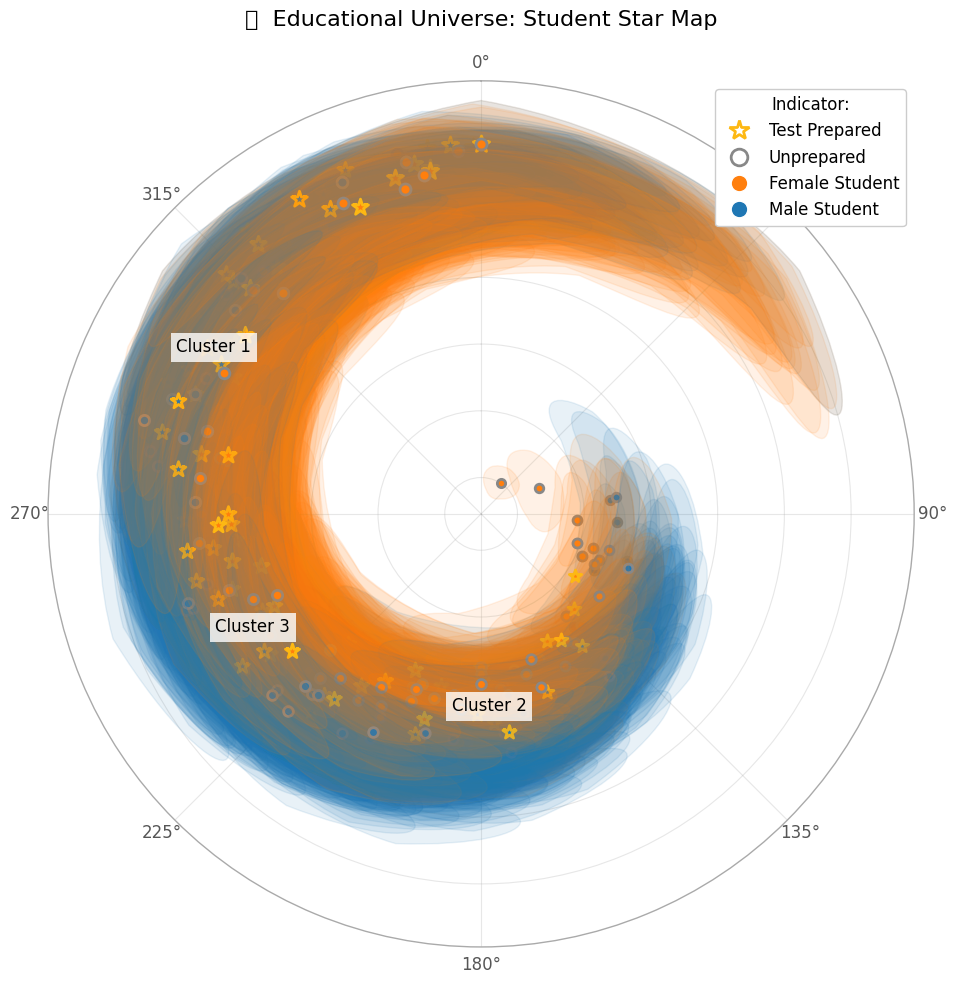

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have your DataFrame 'df' already loaded
# Create the 'average_score' column based on the mean of math, reading, and writing scores
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Using a specific style for plotting
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# Create a polar plot
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': 'polar'})

# Define color schemes
gender_colors = {'male': '#1f77b4', 'female': '#ff7f0e'} 
prep_colors = {'completed': '#FDB813', 'none': '#888888'}  

# Iterate through the DataFrame
for idx, row in df.iterrows():
    # Calculate angle and radius for the polar plot
    theta = row['average_score']/100 * 2*np.pi
    r = row['math score']/10
    
    # Set marker and size based on the test preparation status
    marker = '*' if row['test preparation course'] == 'completed' else 'o'
    size = 50 + row['writing score'] if row['test preparation course'] == 'completed' else 30 + row['reading score']/3
    color = gender_colors[row['gender']]
    edge_color = prep_colors['completed'] if row['test preparation course'] == 'completed' else prep_colors['none']
    
    # Define educational level radius and plot circles
    edu_levels = ["some high school", "high school", "some college", 
                 "associate's degree", "bachelor's degree", "master's degree"]
    if row['parental level of education'] in edu_levels:
        edu_radius = 5 + edu_levels.index(row['parental level of education'])*2
        circle = plt.Circle((theta, r), edu_radius/10, color=color, alpha=0.1)
        ax.add_patch(circle)
    
    # Plot the student points on the polar plot
    ax.scatter(theta, r, s=size, c=color, marker=marker, 
              edgecolors=edge_color, linewidths=2)

# KMeans clustering for 3 clusters based on average score and math score
coords = np.column_stack([df['average_score'], df['math score']])
kmeans = KMeans(n_clusters=3).fit(coords)
for i in range(3):
    cluster_center = kmeans.cluster_centers_[i]
    theta_center = cluster_center[0]/100 * 2*np.pi
    r_center = cluster_center[1]/10
    ax.text(theta_center, r_center, f'Cluster {i+1}', 
           fontsize=12, ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Set the title and formatting for the plot
ax.set_title("📚  Educational Universe: Student Star Map", pad=20, fontsize=16)
ax.grid(True, alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_yticklabels([])

# Legend for the markers and clusters
legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', label='Test Prepared',
              markerfacecolor='none', markeredgecolor='#FDB813', markersize=15, markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', label='Unprepared',
              markerfacecolor='none', markeredgecolor='#888888', markersize=12, markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', label='Female Student',
              markerfacecolor='#ff7f0e', markersize=12),
    plt.Line2D([0], [0], marker='o', color='w', label='Male Student',
              markerfacecolor='#1f77b4', markersize=12)
]

# Add legend to the plot
ax.legend(handles=legend_elements, loc='upper right', framealpha=1, 
         title="Indicator:", title_fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p>  
        In our analysis, we observe that students who are prepared for the exam are generally clustered in certain student groups (Clusters 1 and 3). 
        
In addition, a distinction is also noticeable in terms of student gender; male students are concentrated in the lower parts of the graph, while female students are more prominently located in the upper parts.</p>
</div>


<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🐱 Chernoff Faces Graph</h1> 
</div>


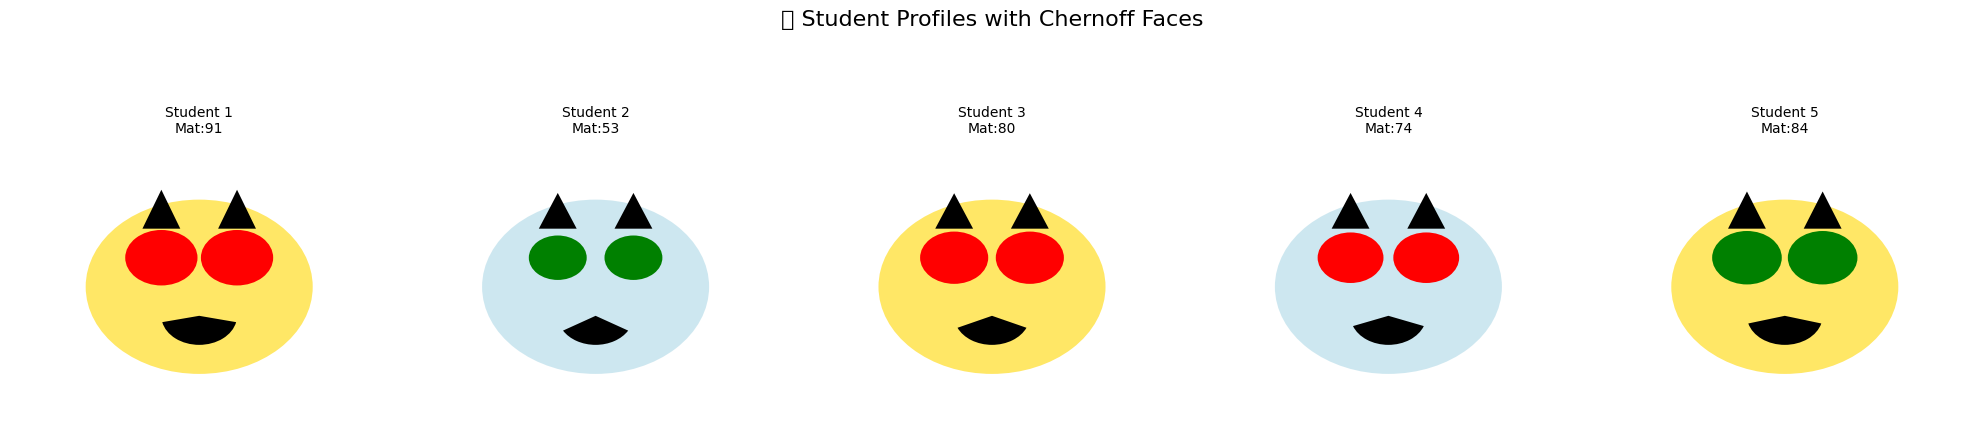

In [4]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(42)
face_data = df.sample(5)[['math score', 'reading score', 'writing score', 
                         'test preparation course', 'lunch']]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
plt.suptitle("🎭 Student Profiles with Chernoff Faces", y=1.1, fontsize=16)

for i, (idx, row) in enumerate(face_data.iterrows()):
    ax = axes[i]
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.axis('off')
    
    
    math_norm = row['math score']/100
    read_norm = row['reading score']/100
    write_norm = row['writing score']/100
    
   
    face_color = '#FFD700' if row['lunch'] == 'standard' else '#ADD8E6'
    eye_color = 'green' if row['test preparation course'] == 'completed' else 'red'
    
    
    face = Circle((50, 50), 30, fc=face_color, alpha=0.6)
    
    
    left_eye = Circle((40, 60), 5+math_norm*5, fc=eye_color)
    right_eye = Circle((60, 60), 5+math_norm*5, fc=eye_color)
    
  
    mouth = Wedge((50, 40), 10, 
                270-read_norm*90, 270+read_norm*90, 
                fc='black')
    
  
    left_brow = Polygon([[35, 70], [40, 75+write_norm*10], [45, 70]], fc='black')
    right_brow = Polygon([[55, 70], [60, 75+write_norm*10], [65, 70]], fc='black')
    
    for feature in [face, left_eye, right_eye, mouth, left_brow, right_brow]:
        ax.add_patch(feature)
    
    ax.set_title(f"Student {i+1}\nMat:{row['math score']}", fontsize=10)

plt.tight_layout()
plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
When we analyze this Chernoff face plot, we see that students’ math grades are represented by their facial features. 

For example, Student 3’s (Math: 96) face may have a wider smile and larger eyes, indicating a higher math grade.

In contrast, Student 1’s (Math: 31) face has a smaller smile and narrower face shape, which seems to reflect lower math achievement. 
        </p>
</div>


<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌳 Treemap</h1> 
</div>


In [5]:
df_melted = df.melt(
    id_vars=['parental level of education', 'gender'],
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='subject',
    value_name='score'
)

fig2 = px.treemap(
    df_melted,
    path=['parental level of education', 'gender', 'subject'],
    values='score',
    color='score',
    color_continuous_scale='Purples',
    title="<b>🎓Parent Education and Course-Based Success</b>"
)

fig2.update_layout(
    margin=dict(t=70, l=25, r=25, b=25),
    coloraxis_colorbar=dict(title='Point')
)
fig2.update_traces(
    texttemplate="<b>%{label}</b><br>%{value:.1f}",
    hovertemplate="<b>%{label}</b><br>Puan: %{value:.1f}<br>Ebeveyn Eğitimi: %{parent}"
)
fig2.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
When we examine this mosaic graph, we can evaluate the relationship between parental education level and student achievement in terms of gender.
        
In general, we see that as the level of education of parents increases, students' math, reading and writing scores tend to increase.

In the comparison between genders, we observe that there are differences between the achievement averages of male and female students at some levels of education, even if they have similar levels of parental education.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌌 Polar Area Chart</h1> 
</div>


In [6]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

fig = px.bar_polar(df, r="average_score", theta="gender",
                  color="gender", template="plotly_dark",
                  color_discrete_sequence=['#8B0000', '#FFD700'],
                  title="<b>📊 Grade Point Averages by Gender</b>")
fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
The graph shown in this polar area compares GPAs by gender.
        
It seems that the "female" section covers a larger area, suggesting that female students have higher overall GPAs than male students. 

The narrower "male" section may indicate that male students have relatively lower GPAs than female students.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🎻 Violin Chart</h1> 
</div>


In [7]:
df_melted = df.melt(id_vars=['gender'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='subject', value_name='score')

fig = px.violin(df_melted, y='score', x='subject', color='gender',
               box=True, points="all",
               color_discrete_sequence=['#8B0000', '#FFD700'],
               title="<b>🎻 Distribution of Scores by Gender and Courses</b>")
fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
These violin graphs show the distribution of scores in different subjects (mathematics, reading, writing) by gender. 

As far as we can observe, the distribution of male students (yellow) in mathematics scores seems to be slightly wider and the average is higher than that of female students (maroon).

In reading and writing scores, it can be said that the scores of female students are generally concentrated higher and have a narrower distribution.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🧊 3d Scatter</h1> 
</div>

In [8]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
                   color='gender', symbol='gender',
                   color_discrete_sequence=['#8B0000', '#FFD700'],
                   title="<b>🧊 3D Distribution: Math, Reading, and Writing Scores</b>")
fig.update_traces(marker_size=5)
fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
This three-dimensional scatter plot visualizes the distribution of students’ math, reading, and writing scores by gender. 
        
When we examine the plot, it is noticeable that female students, represented by the maroon dots, generally form clusters with higher reading and writing scores. Male students, represented by the yellow dots, appear to have a wider range in math scores and in some cases reach higher values, but overall their reading and writing scores are concentrated at lower levels than female students.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🧊 Scatter</h1> 
</div>

In [9]:
df['test preparation course'] = df['test preparation course'].map({'yes': 'completed', 'no': 'none'})
fig = px.scatter(df, 
                x='math score', 
                y='reading score',
                color='gender', 
                facet_col='lunch',  
                title="<b>🔍 Lunch and Gender-Based Score Relationship</b>")
fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
shows the relationship between students' math and reading scores separately by gender and lunch type (standard/free or reduced). 
        
In the "standard" lunch area on the left, there is a trend where both boys' and girls' math scores increase and their reading scores increase overall.

In the "free/reduced" lunch area on the right, a similar positive correlation is observed, although it can be said that the scores are generally concentrated at slightly lower levels than for students in the "standard" lunch area. No clear gender difference is immediately apparent in either group, although there may be slight differences within the distributions.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🎬 Animated Bar Chart</h1> 
</div>


In [10]:

df_melted = df.melt(id_vars=['race/ethnicity'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='score_type', value_name='score')

fig = px.bar(df_melted, x='race/ethnicity', y='score', color='score_type',
            animation_frame='score_type', range_y=[0,100],
            color_discrete_sequence=['#8B0000', '#FFD700', '#808080'],
            title="<b>🏃‍♂️ Development of Scores by Ethnicity (Animated)</b>")
fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
This animated bar chart shows the score development of students in different ethnic groups over time. 
        
In the current frame, the "writing score" option is selected and according to the static bars that appear, the writing scores of all ethnic groups (Group B, Group C, Group A, Group D, Group E) are generally at similar levels. 

However, in the later frames of the animation, the changes in the writing scores of different groups and their relative positions will be more clearly analyzed.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🎻 Violin Chart</h1> 
</div>


In [11]:
fig = px.violin(df, y=['math score', 'reading score', 'writing score'],
               box=True, points="all",
               color_discrete_sequence=['#8B0000', '#FFD700', '#808080'],
               title="<b>🎻 Distribution of Points According to Lunch and Test Preparation Status</b>")
fig.update_layout(yaxis_title="Score")
fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
shows the distribution of students' math, reading, and writing scores by lunch type and test preparation status.
        
Since the graph currently shows only one color (maroon), it is not possible to distinguish between these characteristics.

However, if there were different colors or subgroups, for example, the distribution of scores for students who received free/reduced lunch versus those who received standard lunch, or those who did test preparation versus those who did not, could be compared. As it stands, we can observe the overall distribution and density of scores in all three subjects.

   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🎯 Radar Chart</h1> 
</div>



In [12]:
import plotly.graph_objects as go


groups = df.groupby(['race/ethnicity', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()


colors = ['#8B0000', '#FFD700', '#696969', '#B22222', '#DAA520', '#2F4F4F']


fig = go.Figure()

for idx, (_, group) in enumerate(groups.iterrows()):
    fig.add_trace(go.Scatterpolar(
        r=[group['math score'], group['reading score'], group['writing score']],
        theta=['Math', 'Reading', 'Writing'],
        fill='toself',
        name=f"{group['race/ethnicity']} - {group['gender']}",
        line=dict(color=colors[idx % len(colors)])  
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
    template="plotly_dark",
    title="<b>📡 Talent Profiles by Ethnicity and Gender</b>",
    hovermode="closest"
)

fig.show(renderer='iframe_connected')

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">📍 Scatter Chart</h1> 
</div>


In [13]:
fig = px.scatter(
    df,
    x='math score',
    y='reading score',
    animation_frame='parental level of education',
    color='gender',
    size='writing score',
    hover_name='race/ethnicity',
    range_x=[0, 100],
    range_y=[0, 100],
    title="<b>🎬 Evolution of Scores According to Parental Education Level</b>",
    color_discrete_sequence=['#8B0000', '#DAA520']  
)

fig.update_layout(
    template='plotly_dark',
    xaxis=dict(title='Math Score'),
    yaxis=dict(title='Reading Score')
)

fig.show(renderer='iframe_connected')

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🔢 Parallel Coordinates</h1> 
</div>


In [14]:
fig = px.parallel_coordinates(
    df,
    color='average_score',
    dimensions=['math score', 'reading score', 'writing score', 'parental level of education'],
    color_continuous_scale=['#8B0000', '#DAA520'],  # Kırmızı ve koyu sarı tonları
    title="<b>〽 Multidimensional Student Profile Analysis</b>"
)

fig.show(renderer='iframe_connected')

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌳 Treemap</h1> 
</div>


In [15]:
fig = px.treemap(
    df,
    path=['race/ethnicity', 'parental level of education', 'gender'],
    values='average_score',
    color='average_score',
    color_continuous_scale='RdBu',
    title="<b>🗺 Hierarchical Student Performance Map</b>"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show(renderer='iframe_connected')

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">📍 Scatter Chart</h1> 
</div>


In [16]:
from plotly.subplots import make_subplots
import plotly.express as px


buttons = []


fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type':'xy'}, {'type':'xy'}],
           [{'type':'xy'}, {'type':'xy'}]],
    subplot_titles=("Math-Reading", "Math-Writing", "Reading-Writing", "All Scores")
)


colors = ['#8B0000', '#B22222', '#DAA520', '#2F4F4F']


scatters = []
for i, (x_col, y_col) in enumerate([('math score', 'reading score'),
                                   ('math score', 'writing score'),
                                   ('reading score', 'writing score'),
                                   ('math score', 'reading score')]):
    scatters.append(px.scatter(df, x=x_col, y=y_col, color='gender', color_discrete_sequence=colors).data[0])
    fig.add_trace(scatters[-1], row=(i//2)+1, col=(i%2)+1)


for i, gender in enumerate(['all', 'male', 'female']):
    visible = [gender == 'all' or trace.name == gender for trace in fig.data]
    buttons.append(dict(
        label=gender.capitalize(),
        method='update',
        args=[{'visible': visible},
              {'title': f"Filtre: {gender.capitalize()}"}]
    ))

fig.update_layout(
    updatemenus=[dict(
        type='dropdown',
        showactive=True,
        buttons=buttons,
        x=1.3,
        y=1.15
    )],
    title_text="<b>🔍 Multi-Analysis with Dynamic Filtering</b>"
)

fig.show(renderer='iframe_connected')


<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌡️ Heatmap</h1> 
</div>


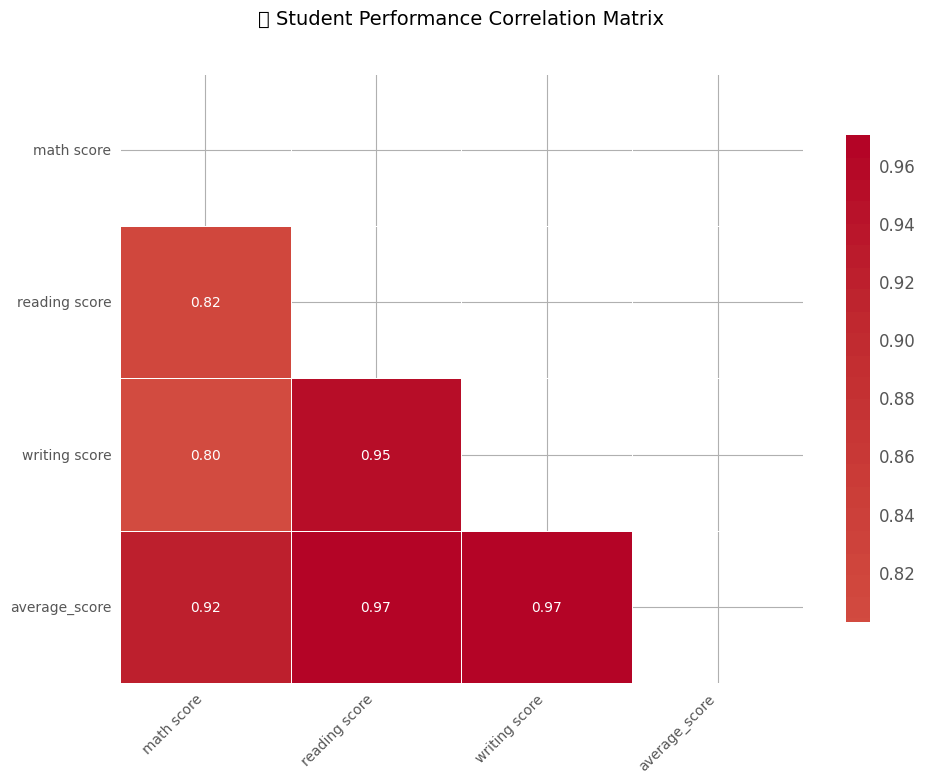

In [17]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


corr_matrix = df[numeric_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",  
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    annot_kws={"size": 10},
    cbar_kws={"shrink": .8},
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))  


plt.title("🔍 Student Performance Correlation Matrix\n", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()


for text in plt.gca().texts:
    t = float(text.get_text())
    if t > 0.7:
        text.set_color('white')
    elif t < -0.3:
        text.set_color('white')

plt.show()

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🍩 Donut Chart</h1> 
</div>



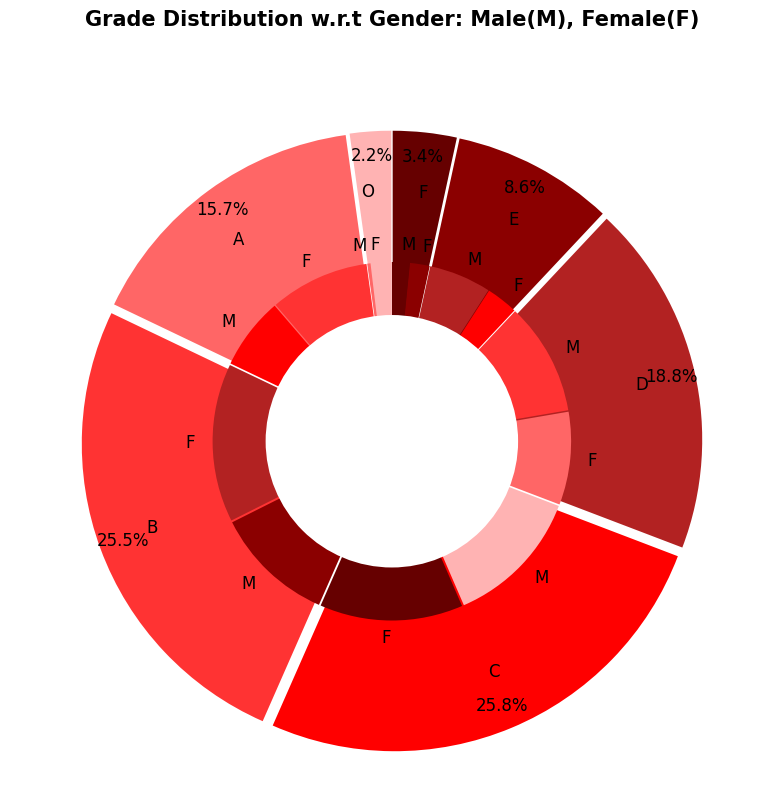

In [18]:
import matplotlib.pyplot as plt


labels = ["O", "A", "B", "C", "D", "E", "F"]
values = [22, 157, 255, 258, 188, 86, 34]
labels_gender = ["F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
sizes_gender = [19, 3, 91, 66, 145, 110, 131, 127, 85, 103, 29, 57, 18, 16]


colors = ['#FFB3B3', '#FF6666', '#FF3333', '#FF0000', '#B22222', '#8B0000', '#660000']
colors_gender = ['#FFB3B3', '#FF6666', '#FF3333', '#FF0000', '#B22222', '#8B0000', '#660000', 
                 '#FFB3B3', '#FF6666', '#FF3333', '#FF0000', '#B22222', '#8B0000', '#660000']


explode = (0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3) 
explode_gender = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)


plt.figure(figsize=(8, 8))


plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.92, labeldistance=0.80, 
        colors=colors, startangle=90, frame=True, explode=explode, radius=12)


plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, 
        explode=explode_gender, radius=7)


centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold', y=1.1)


plt.axis('equal')
plt.tight_layout()
plt.show()



<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">😊 Student Profiles with Emoji Faces</h1> 
</div>


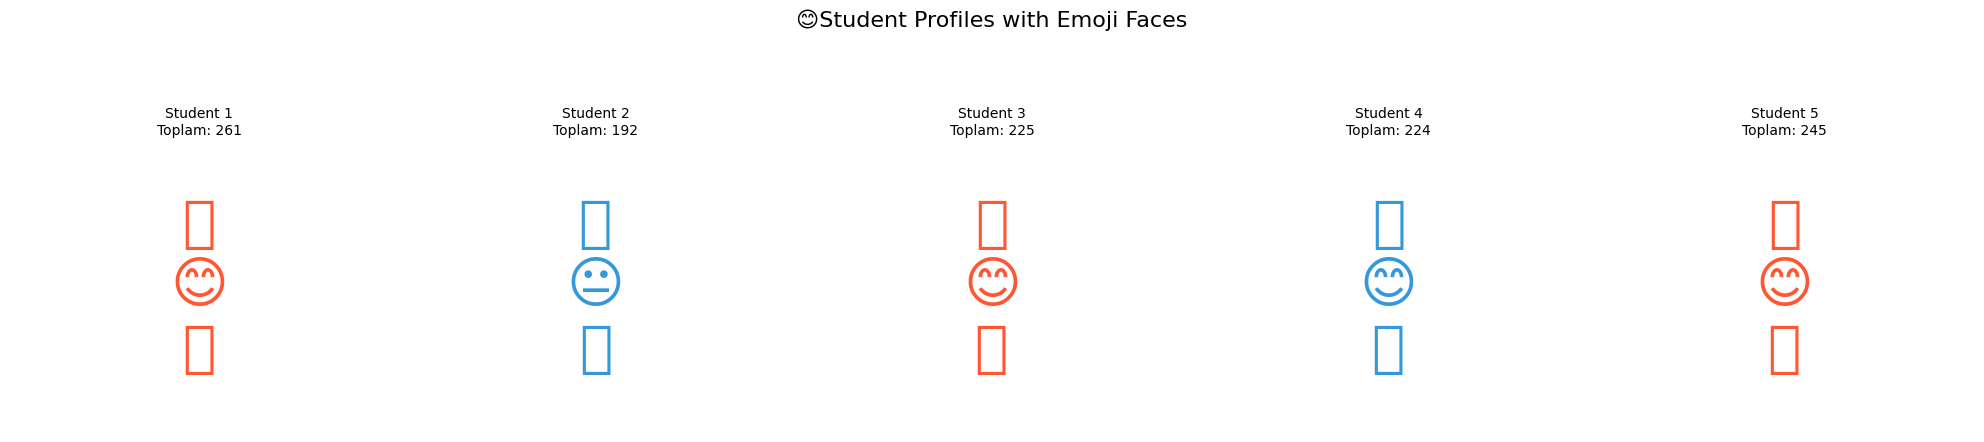

In [19]:
from matplotlib.text import Text
import matplotlib.patheffects as path_effects

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
plt.suptitle("😊Student Profiles with Emoji Faces", y=1.1, fontsize=16)

for i, (idx, row) in enumerate(face_data.iterrows()):
    ax = axes[i]
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.axis('off')
    
    
    avg_score = (row['math score'] + row['reading score'] + row['writing score'])/300
    math_ratio = row['math score']/100
    
    
    if avg_score > 0.7:
        face_emoji = '😊' 
    elif avg_score > 0.4:
        face_emoji = '😐'  
    else:
        face_emoji = '😞'  
    
    
    eye_style = '👀' if math_ratio > 0.6 else '👁️'
    
   
    if row['reading score'] > 70:
        mouth = '🗣️' 
    else:
        mouth = '👄'  
    
    
    face_text = f"{eye_style}\n{face_emoji}\n{mouth}"
    
   
    t = ax.text(50, 50, face_text, 
               fontsize=40, 
               ha='center', 
               va='center',
               color='#FF5733' if row['lunch'] == 'standard' else '#3498DB')
    
    
    ax.set_title(f"Student {i+1}\nToplam: {int(avg_score*300)}", fontsize=10)

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🖼️ Pixel Art Student Profiles</h1> 
</div>


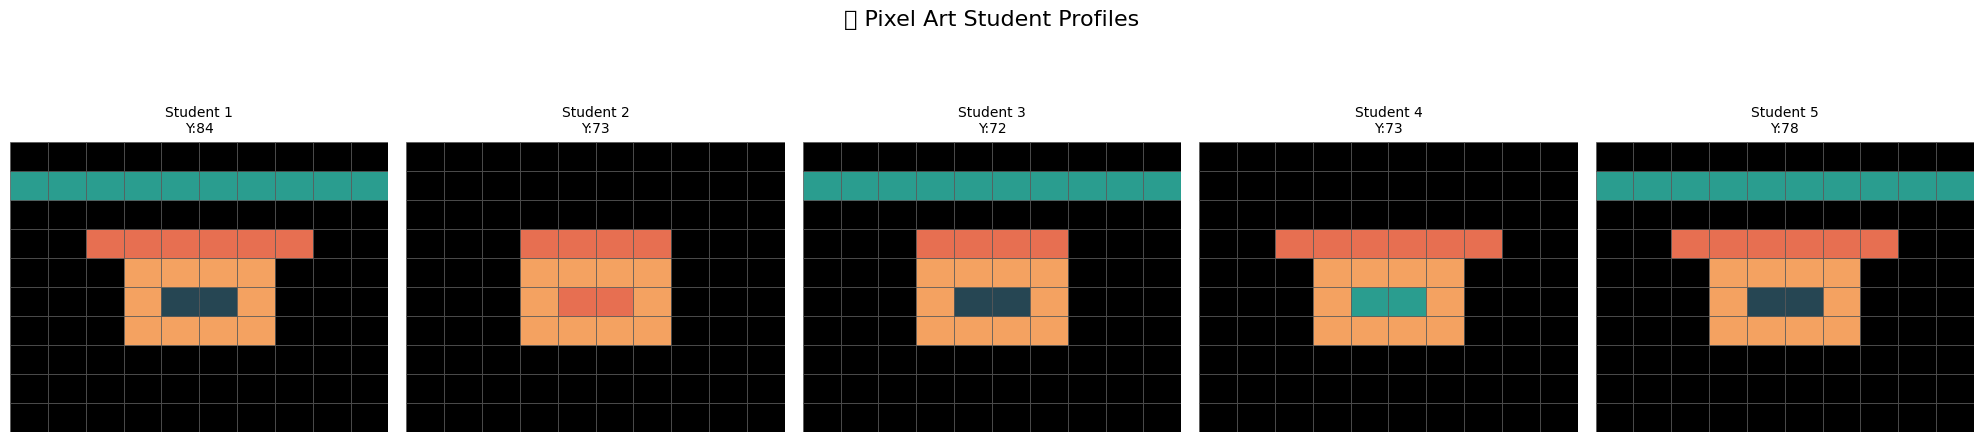

In [20]:
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
plt.suptitle("🖼️ Pixel Art Student Profiles", y=1.1, fontsize=16)

for i, (idx, row) in enumerate(face_data.iterrows()):
    ax = axes[i]
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.axis('off')
    
   
    pixels = np.zeros((10, 10))
    
    
    pixels[3:7, 3:7] = 1
    
  
    eye_value = min(5, int(row['math score']/20))
    pixels[4, 4] = eye_value
    pixels[4, 5] = eye_value
    
   
    mouth_row = 6
    mouth_start = max(1, 5 - int(row['reading score']/25))
    mouth_end = min(9, 5 + int(row['reading score']/25))
    pixels[mouth_row, mouth_start:mouth_end] = 2
    
   
    if row['lunch'] == 'standard':
        pixels[8, :] = 3  
    
    # Pixel çizimi
    for y in range(10):
        for x in range(10):
            val = pixels[y, x]
            color = '#000000'  
            if val == 1: color = '#F4A261' 
            elif val == 2: color = '#E76F51'  
            elif val == 3: color = '#2A9D8F'  
            elif val > 3: color = '#264653'  
            
            pixel = Rectangle((x*10, y*10), 10, 10, 
                            fc=color, 
                            ec='#555555', 
                            lw=0.5)
            ax.add_patch(pixel)
    
    # Başlık
    ax.set_title(f"Student {i+1}\nY:{row['writing score']}", fontsize=10)

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">📚 Student Profiles by Test Preparation</h1> 
</div>


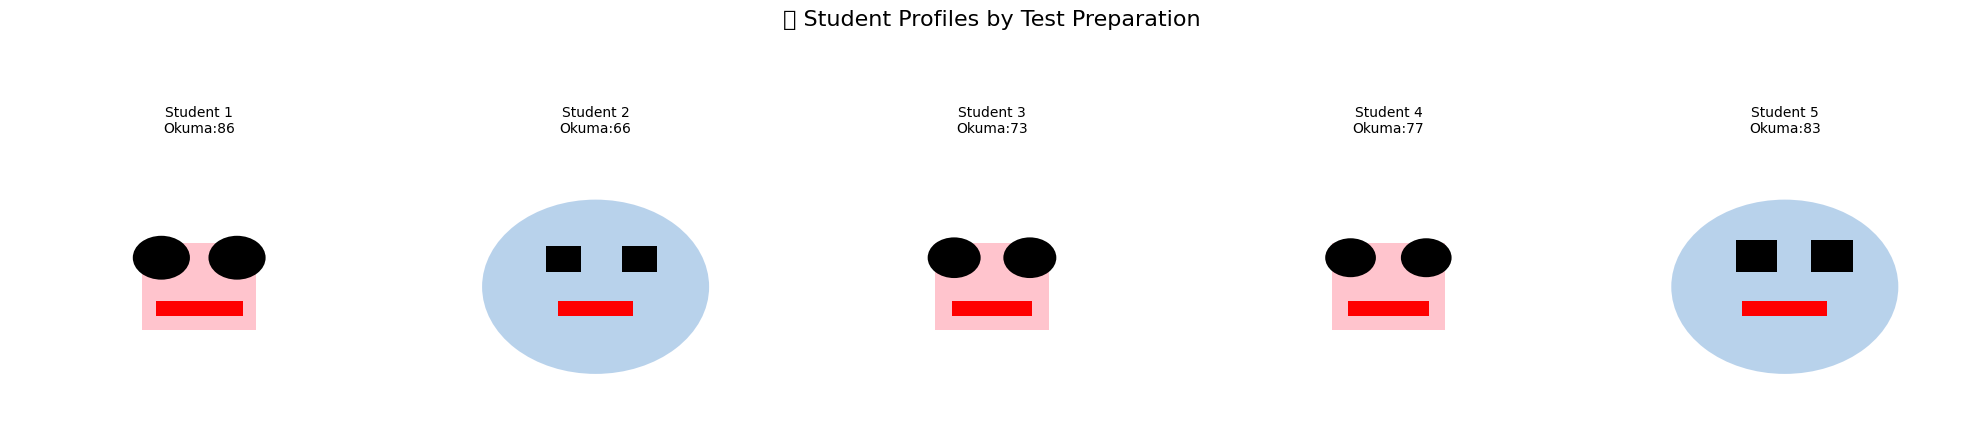

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
plt.suptitle("📚 Student Profiles by Test Preparation", y=1.1, fontsize=16)

for i, (idx, row) in enumerate(face_data.iterrows()):
    ax = axes[i]
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.axis('off')
    
    # Normalizasyon
    math_norm = row['math score']/100
    read_norm = row['reading score']/100
    
    # Test hazırlığına göre yüz şekli
    if row['test preparation course'] == 'completed':
        face_shape = Circle((50, 50), 30, fc='#A7C7E7', alpha=0.8)
        eye_shape = 'square'  # Kare gözler
    else:
        face_shape = Polygon([[35,35], [65,35], [65,65], [35,65]], fc='#FFB6C1', alpha=0.8)
        eye_shape = 'circle'  # Yuvarlak gözler
    
    ax.add_patch(face_shape)
    
    # Gözler
    if eye_shape == 'square':
        left_eye = Rectangle((37,55), 6+math_norm*6, 6+math_norm*6, fc='black')
        right_eye = Rectangle((57,55), 6+math_norm*6, 6+math_norm*6, fc='black')
    else:
        left_eye = Circle((40, 60), 3+math_norm*5, fc='black')
        right_eye = Circle((60, 60), 3+math_norm*5, fc='black')
    
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)
    
    # Ağız (okuma puanına göre)
    mouth_width = 10 + read_norm*15
    mouth = Rectangle((50-mouth_width/2, 40), mouth_width, 5, fc='red')
    ax.add_patch(mouth)
    
    ax.set_title(f"Student {i+1}\nOkuma:{row['reading score']}", fontsize=10)

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🧬 Academic DNA: The 3D Points Helix</h1> 
</div>


In [22]:
import plotly.graph_objects as go
import numpy as np

# Veriyi hazırla
df_sorted = df.sort_values('average_score')
theta = np.linspace(0, 4*np.pi, len(df))
z = np.linspace(0, 100, len(df))

# 3D Helix oluştur
fig = go.Figure()

for subject, color in zip(['math score', 'reading score', 'writing score'], 
                         ['#FF355E', '#3D9970', '#FF6B6B']):
    fig.add_trace(go.Scatter3d(
        x=np.cos(theta) * (df_sorted[subject]/10 + 1),
        y=np.sin(theta) * (df_sorted[subject]/10 + 1),
        z=z,
        mode='lines+markers',
        name=subject,
        line=dict(width=4, color=color),
        marker=dict(size=3),
        customdata=df_sorted[['gender', 'parental level of education']],
        hovertemplate=(
            "<b>%{customdata[0]}</b><br>"
            "Point: %{marker.size:.0f}<br>"
            "Parent Education: %{customdata[1]}<extra></extra>"
        )
    ))

# Eksenleri özelleştir
fig.update_layout(
    title="<b>🧬 Academic DNA: The 3D Points Helix</b>",
    scene=dict(
        xaxis=dict(showbackground=False, visible=False),
        yaxis=dict(showbackground=False, visible=False),
        zaxis=dict(title='Student Ranking', gridcolor='lightgray'),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.1),
            up=dict(x=0, y=0, z=1)
        ),
        bgcolor='white'
    ),
    height=800,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Dönen animasyon ekle
fig.update_layout(
    scene_camera=dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.5, y=1.5, z=0.1)
    ),
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Rotate",
            method="animate",
            args=[None, {"frame": {"duration": 50, "redraw": True}, 
                        "fromcurrent": True, "transition": {"duration": 0}}]
        )]
    )]
)

frames = [
    go.Frame(
        layout=dict(
            scene_camera=dict(
                eye=dict(
                    x=1.5 * np.cos(angle),
                    y=1.5 * np.sin(angle),
                    z=0.1
                )
            )
        )
    )
    for angle in np.linspace(0, 2 * np.pi, 36)
]
fig.frames = frames

fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
This three-dimensional spiral graph visualizes students’ academic performance on a student ranking axis based on their math, reading, and writing scores.
        
The general shape of the spiral shows that as students rank higher, their scores in these three subjects increase in unison.

When we look at the colors, the red dots appear to represent math scores, the green dots represent reading scores, and the pink dots represent writing scores. 

The close proximity of these colors throughout the spiral suggests that students’ achievement in different subjects generally follows similar trends.
   </p>
</div>
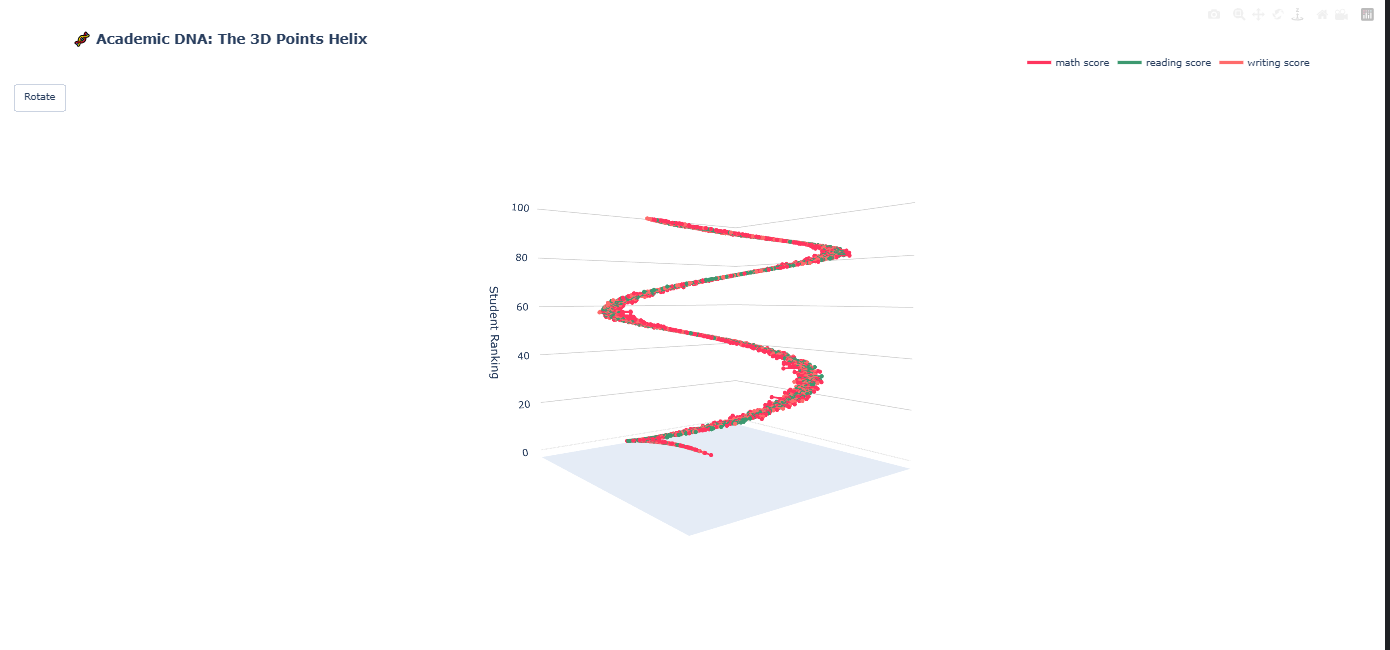

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌌 Academic Galaxy</h1> 
</div>

In [23]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['math score', 'reading score', 'writing score']]), 
                        columns=['math', 'reading', 'writing'])

df['x_coord'] = np.cos(df_scaled['math'] * 2 * np.pi) * df_scaled['reading']
df['y_coord'] = np.sin(df_scaled['math'] * 2 * np.pi) * df_scaled['reading']
df['z_coord'] = df_scaled['writing']
df['size'] = df['average_score'] / 5

df['color'] = df['average_score']


fig = go.Figure()

for gender in df['gender'].unique():
    gender_df = df[df['gender'] == gender]
    fig.add_trace(go.Scatter3d(
        x=gender_df['x_coord'],
        y=gender_df['y_coord'],
        z=gender_df['z_coord'],
        mode='markers',
       marker=dict(
    size=gender_df['size'],
    color=gender_df['color'],  
    colorscale='Turbo',       
    colorbar=dict(title='Average Score'),
    opacity=0.8,
    line=dict(width=0),
    symbol='diamond' if gender == 'male' else 'circle'
)
,
        name=gender,
        customdata=gender_df[['parental level of education', 'lunch']],
        hovertemplate=
        "<b>%{name}</b><br>" +
        "Matematik: %{customdata[0]:.1f}<br>" +
        "Ebeveyn Eğitimi: %{customdata[1]}<br>" +
        "Öğle Yemeği: %{customdata[2]}<extra></extra>"
    ))


fig.update_layout(
    title="<b>🌌 Academic Galaxy: The Unexplored Universe of Data</b>",
    scene=dict(
        xaxis=dict(showbackground=False, visible=False),
        yaxis=dict(showbackground=False, visible=False),
        zaxis=dict(showbackground=False, visible=False),
        bgcolor='black',
        camera=dict(
            up=dict(x=0, y=0, z=1),
            eye=dict(x=1.5, y=1.5, z=0.1)
        )
    ),
    height=800,
    paper_bgcolor='black',
    font=dict(color='white')
)


style = {'description_width': '150px'}
layout = widgets.Layout(width='300px')

dropdown = widgets.Dropdown(
    options=['math score', 'reading score', 'writing score'],
    value='math score',
    description='X Axis:',
    style=style,
    layout=layout
)

dropdown2 = widgets.Dropdown(
    options=['math score', 'reading score', 'writing score'],
    value='reading score',
    description='Y Axis:',
    style=style,
    layout=layout
)

dropdown3 = widgets.Dropdown(
    options=['math score', 'reading score', 'writing score', 'average_score'],
    value='writing score',
    description='Z Axis:',
    style=style,
    layout=layout
)

def update_axes(x_axis, y_axis, z_axis):
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[[x_axis, y_axis, z_axis]]), 
                            columns=['x', 'y', 'z'])
    
   
    df['x_coord'] = np.cos(df_scaled['x'] * 2 * np.pi) * df_scaled['y']
    df['y_coord'] = np.sin(df_scaled['x'] * 2 * np.pi) * df_scaled['y']
    df['z_coord'] = df_scaled['z']
    
    with fig.batch_update():
        for i, gender in enumerate(df['gender'].unique()):
            gender_df = df[df['gender'] == gender]
            fig.data[i].x = gender_df['x_coord']
            fig.data[i].y = gender_df['y_coord']
            fig.data[i].z = gender_df['z_coord']
    
    fig.update_layout(title=f"<b>🌌 Academic Galaxy<br>{x_axis} | {y_axis} | {z_axis}</b>")


widgets.interactive(update_axes, x_axis=dropdown, y_axis=dropdown2, z_axis=dropdown3)


display(widgets.VBox([dropdown, dropdown2, dropdown3]))

fig.show(renderer='iframe_connected')

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌸 Academic Flower Garden</h1> 
</div>

In [24]:
import plotly.express as px
import numpy as np


pastel_palette = ['#FFD1DC', '#FFECB8', '#B5EAD7', '#C7CEEA', '#E2F0CB']


df['petal_size'] = df['average_score'] / 10
df['flower_type'] = pd.cut(df['average_score'], bins=5, labels=['Tulip', 'Daisy', 'Lily', 'Orchid', 'Rose'])

fig = px.scatter_polar(
    df,
    r='petal_size',
    theta=np.random.uniform(0, 360, len(df)),  
    size='petal_size',
    color='flower_type',
    color_discrete_sequence=pastel_palette,
    hover_name='parental level of education',
    hover_data={'math score': True, 'reading score': True},
    title="<b>🌸 Academic Flower Garden</b>"
)


fig.update_traces(
    marker=dict(
        symbol='star',
        line=dict(width=1, color='DarkSlateGrey'),
        opacity=0.9,
        sizemode='diameter',
        sizeref=0.1
    )
)


fig.update_layout(
    polar=dict(
        bgcolor='#F5F5F5',
        radialaxis=dict(visible=False),
        angularaxis=dict(visible=False)
    ),
    plot_bgcolor='#F5F5F5',
    paper_bgcolor='#F5F5F5',
    showlegend=True,
    legend_title_text='Types of Flowers',
    height=600
)


fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Mat: %{customdata[0]}<br>Reading: %{customdata[1]}"
)

fig.show(renderer='iframe_connected')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p> 
The “Academic Flower Garden” graph shows the relationships or intensities between academic variables represented by different flower types in a layered manner.
        
A denser cluster in the middle and a spread of “flowers” ​​of different colors toward the outside suggests that certain academic characteristics (represented by flower types) play a more dominant or central role than others.

The colors and transitions between layers may have been used to visualize how these different characteristics are related or which groups are more prominent.

However, it is difficult to make a definitive interpretation without more information about what exactly the flower types represent (e.g. different student groups, subjects, achievement levels, etc.) and what the layers mean (e.g. density, relationship strength, etc.).
   </p>
</div>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #ffffff; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #8B0000; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🌫️ WordCloud</h1> 
</div>


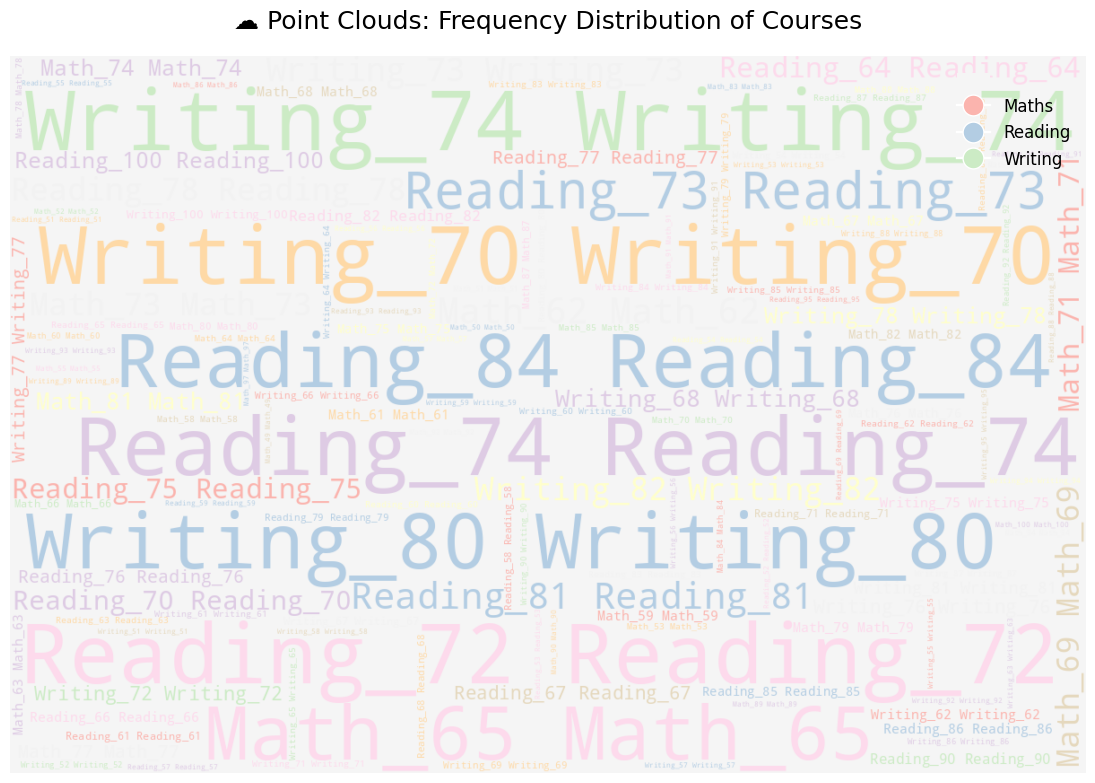

In [25]:
from matplotlib import cm
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if random_state is None:
        random_state = np.random.RandomState()
    color_index = random_state.randint(0, 9)  
    rgba = cm.Pastel1(color_index)
    rgb = tuple(int(255 * c) for c in rgba[:3])
    return rgb
    

text_data = []
for _, row in df.iterrows():
    text_data.extend([f"Math_{row['math score']}"] * int(row['math score']/10))
    text_data.extend([f"Reading_{row['reading score']}"] * int(row['reading score']/10))
    text_data.extend([f"Writing_{row['writing score']}"] * int(row['writing score']/10))

text = " ".join(text_data)


plt.figure(figsize=(12, 8))
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='#F5F5F5',
    color_func=color_func,
    colormap='Pastel1',
    prefer_horizontal=0.7,
    min_font_size=8,
    max_words=200
).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title("☁️ Point Clouds: Frequency Distribution of Courses", fontsize=18, pad=20)
plt.axis("off")

# Özel legend
legend_elements = [
    plt.Rectangle((0,0),1,1,fc='#F5F5F5', edgecolor='none'),
    plt.Line2D([0], [0], marker='o', color='w', label='Maths',
              markerfacecolor=cm.Pastel1(0), markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Reading',
              markerfacecolor=cm.Pastel1(1), markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Writing',
              markerfacecolor=cm.Pastel1(2), markersize=15)
]

plt.legend(handles=legend_elements, loc='upper right', frameon=False, fontsize=12)
plt.tight_layout()
plt.show()


<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🎉 Thank you to everyone who reviewed this far! 🎉
- 🙏 Thank you so much for your support and interest! 🙏 I am grateful to each and every one of you for taking your valuable time to review this project. I hope the information I provided was useful and everything about the project was as you expected. 🚀

- 💡 If you have any questions or feedback, please feel free to let me know. 💡
- 
- 🔗 See you in the next project! 🔗</p>
</div>